In [1]:
import os
from keras.models import load_model
import numpy as np
import math
import os
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import PIL
import matplotlib.pyplot as plt
import cv2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Using TensorFlow backend.
/Users/cfarnes/virtual/csdv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/cfarnes/virtual/csdv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/cfarnes/virtual/csdv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/cfarnes/virtual/csdv/lib/python3.7

In [2]:
model_path="/Users/cfarnes/github/Autonomous-Car/model.h5"

In [3]:
model_m=load_model(model_path)

W0819 16:50:10.384603 4606547392 deprecation_wrapper.py:119] From /Users/cfarnes/virtual/csdv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 16:50:10.411026 4606547392 deprecation_wrapper.py:119] From /Users/cfarnes/virtual/csdv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 16:50:10.559569 4606547392 deprecation_wrapper.py:119] From /Users/cfarnes/virtual/csdv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0819 16:50:10.560410 4606547392 deprecation_wrapper.py:119] From /Users/cfarnes/virtual/csdv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto inste

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

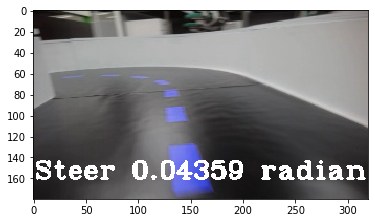

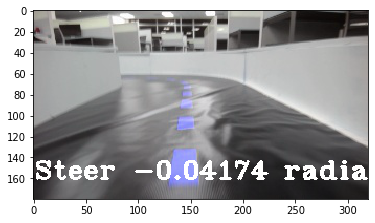

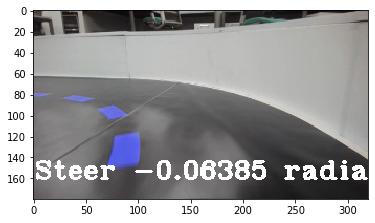

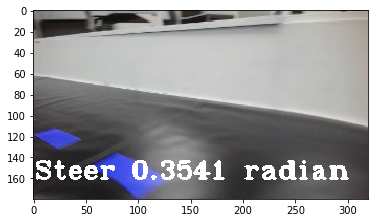

In [4]:
dir='/Users/cfarnes/github/Autonomous-Car/test/'
for filename in os.listdir(dir):
    if filename.endswith('jpg'):
        colourImg = PIL.Image.open(dir+filename)
        nparray = np.asarray(colourImg)
        image = cv2.cvtColor(nparray, cv2.COLOR_RGB2BGR)
        image2=image.reshape(1,180,320,3)
        steering_deg_ratio = float(model_m.predict(image2, batch_size=1))
        steering_deg = (steering_deg_ratio*20)
        new_steering = math.radians(steering_deg)
        str_steering="Steer "+str(round(new_steering,5))+" radian"
        plt.figure()
        texted_image=cv2.putText(img=np.copy(image), text=str_steering, org=(0,160),fontFace=5, fontScale=1.25, color=(255,255,255), thickness=2)
        plt.imshow(texted_image)